<a href="https://colab.research.google.com/github/koDELLL/MachineLearning/blob/main/Tugas_Week_2_CitarumWater.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Berikut adalah penjelasan singkat untuk setiap baris kode di atas:

import pandas as pd:

Mengimpor library pandas, yang digunakan untuk mengelola data dalam bentuk tabel seperti DataFrame. Ini sering digunakan untuk membaca dan memproses dataset.
from sklearn.model_selection import train_test_split:

Mengimpor fungsi train_test_split dari library scikit-learn. Fungsi ini digunakan untuk membagi dataset menjadi dua bagian: data latih (training) dan data uji (testing).
from sklearn.linear_model import LogisticRegression:

Mengimpor model LogisticRegression dari scikit-learn. Model ini digunakan untuk klasifikasi biner atau multikelas, yang memprediksi probabilitas suatu kelas berdasarkan input fitur.
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve:

Mengimpor beberapa metrik evaluasi yang digunakan untuk mengukur kinerja model klasifikasi:
accuracy_score: Mengukur persentase prediksi yang benar dari total prediksi.
precision_score: Mengukur proporsi prediksi positif yang benar.
recall_score: Mengukur proporsi sampel positif yang diprediksi benar oleh model.
f1_score: Menggabungkan precision dan recall menjadi satu metrik harmonis.
roc_auc_score: Mengukur area di bawah kurva ROC (Receiver Operating Characteristic), metrik yang digunakan untuk mengevaluasi kinerja model klasifikasi.
roc_curve: Menghasilkan data yang dibutuhkan untuk membuat grafik ROC, yang menunjukkan trade-off antara True Positive Rate (Recall) dan False Positive Rate.
import matplotlib.pyplot as plt:

Mengimpor library matplotlib.pyplot yang digunakan untuk membuat visualisasi data, seperti grafik dan kurva. Pada konteks ini, mungkin akan digunakan untuk memvisualisasikan kurva ROC (ROC Curve).

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

Kodingan di atas berfungsi untuk memuat dataset dari file CSV yang bernama CitarumWater.csv. Berikut adalah penjelasan singkat dari setiap bagian kodingan:

Import Library: Sebelum menjalankan kode ini, kita biasanya perlu mengimpor pustaka yang diperlukan, seperti pandas. Pastikan Anda sudah mengimpor pustaka ini dengan import pandas as pd.

pd.read_csv(): Fungsi ini digunakan untuk membaca file CSV dan mengubahnya menjadi DataFrame, yaitu struktur data yang digunakan oleh pandas untuk menyimpan data dalam bentuk tabel. DataFrame ini memungkinkan analisis dan manipulasi data dengan lebih mudah.

'/content/CitarumWater.csv': Ini adalah jalur file yang menunjukkan lokasi file CSV yang akan dimuat. Jika Anda menjalankan kode ini di Google Colab, direktori /content/ adalah tempat di mana file biasanya disimpan.

Secara keseluruhan, kode ini akan menghasilkan sebuah objek DataFrame bernama data yang berisi data dari file CitarumWater.csv, dan Anda dapat menggunakan objek ini untuk analisis lebih lanjut.

In [ ]:
# Load dataset
data = pd.read_csv('/content/CitarumWater.csv')


data['Temp']: Ini mengacu pada kolom 'Temp' dalam DataFrame data, yang berisi nilai suhu.

.str.replace('°C', ''): Fungsi ini digunakan untuk menghapus string '°C' dari setiap nilai dalam kolom 'Temp'. Metode .str memungkinkan kita untuk melakukan operasi string pada setiap elemen dalam kolom. Setelah penghapusan, nilai dalam kolom tersebut akan menjadi string tanpa simbol '°C'.

.astype(float): Setelah menghapus '°C', nilai-nilai tersebut masih dalam bentuk string. Metode ini mengonversi string yang tersisa menjadi tipe data float, sehingga dapat digunakan untuk analisis numerik atau perhitungan matematis di kemudian hari.

In [ ]:

# Data Preparation
data['Temp'] = data['Temp'].str.replace('°C', '').astype(float)


data.drop(columns=[...]): Metode drop() digunakan untuk menghapus satu atau lebih kolom dari DataFrame. Dalam hal ini, kita akan menghapus kolom-kolom yang tidak diperlukan untuk analisis lebih lanjut atau untuk pelatihan model.

columns=['No', 'NamaSungai', 'TitikPantau', 'Waktu', 'O2']: Ini adalah daftar nama kolom yang ingin dihapus dari DataFrame.

'No': Mungkin merupakan nomor urut yang tidak memiliki nilai analitis.
'NamaSungai': Nama sungai yang mungkin tidak diperlukan untuk model.
'TitikPantau': Titik pemantauan yang mungkin tidak relevan untuk analisis.
'Waktu': Informasi waktu yang tidak dibutuhkan untuk pelatihan.
'O2': Kolom ini mungkin tidak relevan untuk model yang ingin dibangun.
cleaned_data: Hasil dari operasi ini disimpan dalam DataFrame baru yang disebut cleaned_data, yang sekarang hanya berisi kolom-kolom yang relevan untuk analisis atau pelatihan model.

In [ ]:
# Drop irrelevant columns for training
cleaned_data = data.drop(columns=['No', 'NamaSungai', 'TitikPantau', 'Waktu', 'O2'])

cleaned_data.dropna(): Metode dropna() digunakan untuk menghapus semua baris yang memiliki satu atau lebih nilai hilang dalam DataFrame. Baris-baris yang tidak memiliki data lengkap tidak akan dipertimbangkan untuk analisis atau pelatihan model.

cleaned_data: Hasil dari operasi ini akan disimpan kembali ke dalam DataFrame yang sama, yaitu cleaned_data. Ini berarti bahwa cleaned_data yang baru akan berisi hanya baris-baris yang memiliki semua nilai yang tersedia (tanpa nilai hilang).

In [ ]:
# Drop missing values
cleaned_data = cleaned_data.dropna()

X = cleaned_data.drop(columns=['Class']):

Metode drop(columns=['Class']) digunakan untuk menghapus kolom 'Class' dari DataFrame cleaned_data.
Hasilnya, X akan berisi semua kolom yang tersisa, yang berfungsi sebagai fitur (independent variables) yang akan digunakan untuk memprediksi nilai target.
y = cleaned_data['Class']:

Ini mengacu pada kolom 'Class' dalam cleaned_data, yang dianggap sebagai variabel target (dependent variable) yang ingin diprediksi oleh model.
Hasilnya, y akan berisi semua nilai dari kolom 'Class', yang merupakan label yang ingin diprediksi berdasarkan fitur yang terdapat di X.

In [ ]:
# Separate features and target
X = cleaned_data.drop(columns=['Class'])
y = cleaned_data['Class']

train_test_split(X, y, test_size=0.3, random_state=42):

Fungsi train_test_split dari pustaka sklearn.model_selection digunakan untuk membagi dataset.
X: Ini adalah fitur yang akan digunakan untuk pelatihan model.
y: Ini adalah variabel target yang ingin diprediksi.
test_size=0.3: Parameter ini menunjukkan bahwa 30% dari data akan digunakan sebagai data uji (testing set), sementara 70% sisanya akan digunakan sebagai data latih (training set).
random_state=42: Ini adalah seed untuk generator angka acak, yang memastikan bahwa pembagian data akan konsisten setiap kali kode dijalankan. Dengan menetapkan nilai ini, Anda dapat mendapatkan hasil yang sama setiap kali melakukan pembagian, yang berguna untuk reproduktibilitas.
X_train, X_test, y_train, y_test:

Hasil dari fungsi train_test_split akan dibagi menjadi empat variabel:
X_train: Fitur untuk data latih.
X_test: Fitur untuk data uji.
y_train: Variabel target untuk data latih.
y_test: Variabel target untuk data uji.


In [ ]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

logreg = LogisticRegression(max_iter=1000):

Ini adalah inisialisasi model regresi logistik dari pustaka sklearn.linear_model.
max_iter=1000: Parameter ini mengatur jumlah maksimum iterasi untuk algoritma pelatihan. Menetapkan nilai ini ke 1000 membantu memastikan konvergensi model, terutama jika data sulit untuk dilatih.
logreg.fit(X_train, y_train):

Metode fit() digunakan untuk melatih model menggunakan data pelatihan.
X_train: Ini adalah fitur yang digunakan untuk melatih model.
y_train: Ini adalah variabel target yang sesuai dengan fitur dalam X_train.

In [ ]:
# Train Logistic Regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

y_pred = logreg.predict(X_test):

Metode predict() digunakan untuk menghasilkan prediksi kelas untuk data pengujian (X_test).
y_pred: Ini adalah array yang berisi prediksi kelas (0 atau 1) untuk setiap contoh dalam data uji, berdasarkan model yang telah dilatih.
y_pred_prob = logreg.predict_proba(X_test)[:, 1]:

Metode predict_proba() digunakan untuk menghasilkan probabilitas untuk masing-masing kelas untuk setiap contoh dalam data uji.
Hasil dari predict_proba(X_test) adalah array dua dimensi, di mana kolom pertama berisi probabilitas kelas 0 dan kolom kedua berisi probabilitas kelas 1.
[:, 1]: Ini mengambil semua baris dan hanya kolom kedua, yang merupakan probabilitas untuk kelas 1.
y_pred_prob: Ini adalah array yang berisi probabilitas dari setiap contoh dalam data uji untuk berada di kelas positif (kelas 1).

In [ ]:
# Predict on test set
y_pred = logreg.predict(X_test)
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred):

Fungsi accuracy_score digunakan untuk menghitung akurasi model, yaitu proporsi prediksi yang benar dibandingkan dengan total prediksi.
accuracy: Ini adalah nilai akurasi yang menunjukkan seberapa baik model dalam mengklasifikasikan data uji.
precision = precision_score(y_test, y_pred, average='weighted'):

Fungsi precision_score digunakan untuk menghitung presisi, yaitu proporsi prediksi positif yang benar (true positives) dibandingkan dengan total prediksi positif.
average='weighted': Ini berarti bahwa presisi dihitung untuk setiap kelas dan kemudian rata-ratanya ditimbang berdasarkan jumlah contoh dalam setiap kelas.
precision: Ini adalah nilai presisi model.
recall = recall_score(y_test, y_pred, average='weighted'):

Fungsi recall_score digunakan untuk menghitung recall (sensitivitas), yaitu proporsi true positives dibandingkan dengan total contoh positif yang sebenarnya.
average='weighted': Menghitung recall untuk setiap kelas dan menimbangnya sesuai dengan jumlah contoh dalam setiap kelas.
recall: Ini adalah nilai recall model.
f1 = f1_score(y_test, y_pred, average='weighted'):

Fungsi f1_score digunakan untuk menghitung skor F1, yang merupakan harmoni rata-rata antara presisi dan recall. Skor F1 memberikan keseimbangan antara keduanya.
average='weighted': Menghitung F1 score untuk setiap kelas dan menimbangnya berdasarkan jumlah contoh dalam setiap kelas.
f1: Ini adalah nilai F1 model.
auc = roc_auc_score(y_test, logreg.predict_proba(X_test), multi_class='ovr'):

Fungsi roc_auc_score digunakan untuk menghitung Area Under the Curve (AUC) dari Receiver Operating Characteristic (ROC), yang menunjukkan kemampuan model dalam membedakan antara kelas positif dan negatif.
multi_class='ovr': Parameter ini menunjukkan bahwa kita menggunakan pendekatan "one-vs-rest" untuk menghitung AUC dalam kasus klasifikasi multi-kelas.
auc: Ini adalah nilai AUC model.

In [ ]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
auc = roc_auc_score(y_test, logreg.predict_proba(X_test), multi_class='ovr')

Fungsi print() digunakan untuk menampilkan nilai akurasi.
Format string f"Akurasi: {accuracy:.4f}" mengatur agar nilai akurasi ditampilkan dengan empat angka desimal.
print(f"Presisi: {precision:.4f}"):

Ini menampilkan nilai presisi model dengan format yang sama, yaitu empat angka desimal.
print(f"Recall: {recall:.4f}"):

Ini menampilkan nilai recall model dengan format empat angka desimal.
print(f"F1-Score: {f1:.4f}"):

Ini menampilkan nilai F1-Score model dengan format empat angka desimal.
print(f"AUC: {auc:.4f}"):

Ini menampilkan nilai AUC model dengan format empat angka desimal.

In [ ]:
# Display metrics
print(f"Akurasi: {accuracy:.4f}")
print(f"Presisi: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"AUC: {auc:.4f}")

Akurasi: 0.9507
Presisi: 0.9508
Recall: 0.9507
F1-Score: 0.9505
AUC: 0.9937


ROC (Receiver Operating Characteristic) berdasarkan probabilitas prediksi model regresi logistik. Berikut adalah penjelasan singkat dari setiap bagian kodingan:

fpr, tpr, _ = roc_curve(y_test, y_pred_prob, pos_label=logreg.classes_[1]):
Fungsi roc_curve digunakan untuk menghitung False Positive Rate (FPR) dan True Positive Rate (TPR) yang diperlukan untuk menggambar kurva ROC.
y_test: Ini adalah nilai sebenarnya dari kelas untuk data uji.
y_pred_prob: Ini adalah probabilitas prediksi untuk kelas positif (kelas 1) yang dihasilkan oleh model.
pos_label=logreg.classes_[1]: Parameter ini menetapkan label positif untuk kurva ROC. logreg.classes_[1] mengacu pada kelas kedua (kelas positif) dari model regresi logistik, yang biasanya merupakan kelas yang ingin kita identifikasi.
fpr: Ini adalah array yang berisi nilai-nilai FPR pada berbagai ambang batas (threshold).
tpr: Ini adalah array yang berisi nilai-nilai TPR pada berbagai ambang batas (threshold).
_: Ini mengacu pada ambang batas (threshold) yang tidak disimpan, tetapi bisa digunakan jika diperlukan.

In [ ]:
# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob, pos_label=logreg.classes_[1])

plt.figure(figsize=(8, 6)):

Ini mengatur ukuran gambar yang akan ditampilkan, dengan lebar 8 inci dan tinggi 6 inci.
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.2f})'):

Fungsi plot() digunakan untuk menggambar kurva ROC menggunakan data yang telah dihitung sebelumnya, yaitu fpr (False Positive Rate) dan tpr (True Positive Rate).
Parameter label menyertakan teks yang menunjukkan nilai AUC (Area Under the Curve), yang dihitung sebelumnya. Format f'ROC curve (AUC = {auc:.2f})' menampilkan AUC dengan dua angka desimal.
plt.plot([0, 1], [0, 1], color='navy', linestyle='--'):

Ini menggambar garis diagonal dari (0, 0) ke (1, 1), yang mewakili model acak. Garis ini digunakan sebagai baseline untuk membandingkan performa model.
plt.xlabel('False Positive Rate'):

Menetapkan label untuk sumbu X, yaitu "False Positive Rate".
plt.ylabel('True Positive Rate'):

Menetapkan label untuk sumbu Y, yaitu "True Positive Rate".
plt.title('ROC Curve'):

Menetapkan judul untuk plot, yaitu "ROC Curve".
plt.legend(loc="lower right"):

Menambahkan legenda ke plot, yang menunjukkan informasi tentang kurva ROC dan nilai AUC, dengan posisi legenda di sudut kanan bawah.
plt.show():

Menampilkan plot yang telah dibuat.

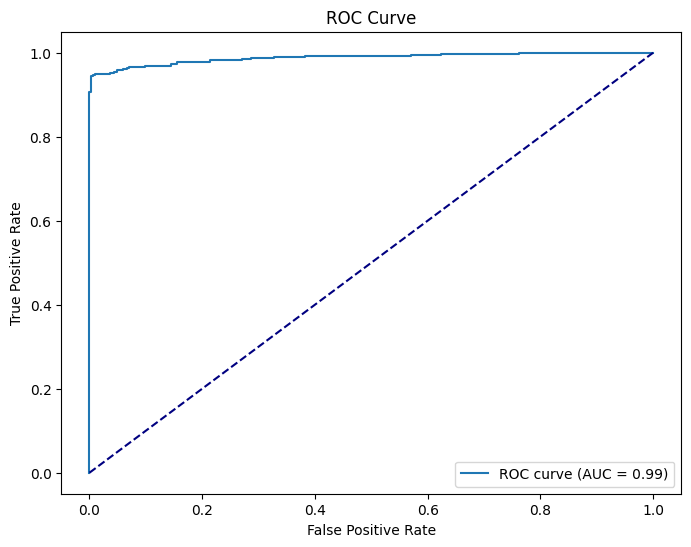

In [ ]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()